In [ ]:
pip install tensorflow pandas numpy matplotlib scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam


LOAD AND PREPARE DATA


In [ ]:
# Load the dataset (adjust the file path as needed)
data = pd.read_csv('infy_stock.csv')
print(data.head())


         Date Symbol Series  Prev Close     Open     High     Low     Last  \
0  2015-01-01   INFY     EQ     1972.55  1968.95  1982.00  1956.9  1971.00   
1  2015-01-02   INFY     EQ     1974.40  1972.00  2019.05  1972.0  2017.95   
2  2015-01-05   INFY     EQ     2013.20  2009.90  2030.00  1977.5  1996.00   
3  2015-01-06   INFY     EQ     1995.90  1980.00  1985.00  1934.1  1965.10   
4  2015-01-07   INFY     EQ     1954.20  1965.00  1974.75  1950.0  1966.05   

     Close     VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  1974.40  1971.34   500691  9.870306e+13   14908              258080   
1  2013.20  2003.25  1694580  3.394669e+14   54166             1249104   
2  1995.90  2004.59  2484256  4.979911e+14   82694             1830962   
3  1954.20  1954.82  2416829  4.724458e+14  108209             1772070   
4  1963.55  1962.59  1812479  3.557162e+14   62463             1317720   

   %Deliverble  
0       0.5154  
1       0.7371  
2       0.7370  
3       0.7332  
4

In [ ]:

# Ensure the data has a 'Close' column
if 'Close' not in data.columns:
    raise ValueError("The dataset must contain a 'Close' column for stock prices.")

# Extract the 'Close' column as the target feature
closing_prices = data['Close'].values.reshape(-1, 1)

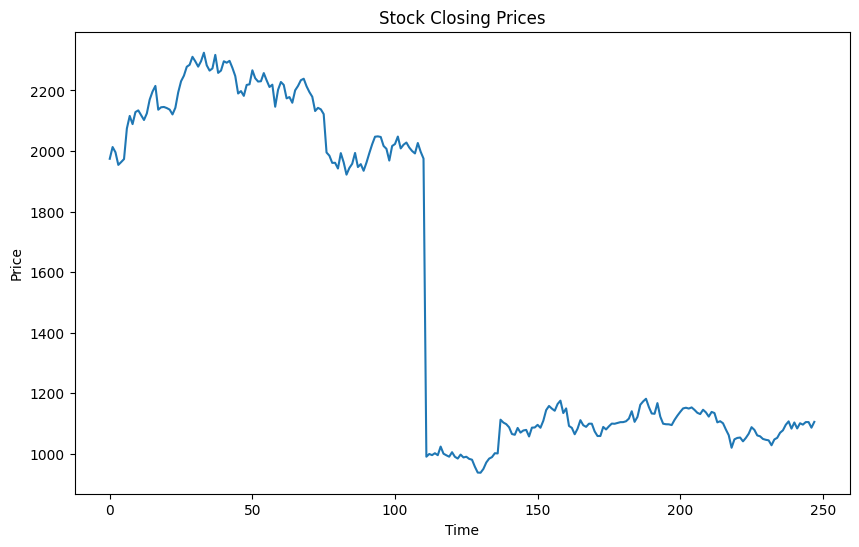

In [ ]:

# Plot the stock prices
plt.figure(figsize=(10, 6))
plt.plot(closing_prices)
plt.title("Stock Closing Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


DATA PREPROCESSING

In [ ]:
# Normalize the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)


In [ ]:

# Define a function to create sequences (sliding window approach)
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [ ]:

# Create sequences with a time step of 60
time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Reshape X to fit LSTM input requirements (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


BUILD THE RNN MODEL WITH LSTM

In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - loss: 0.1853 - val_loss: 7.5325e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0433 - val_loss: 0.0203
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0500 - val_loss: 0.0031
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0238 - val_loss: 5.2879e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0269 - val_loss: 0.0011
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0190 - val_loss: 0.0012
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0170 - val_loss: 5.6443e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0195 - val_loss: 8.0679e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0207 - val_loss: 5.4314e-04
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0211 - val_loss: 5.3227e-04
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0213 - val_loss: 4.6818e-04
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss

EVALUATE AND MAKE PREDICTIONS

In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# Inverse transform to get the actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


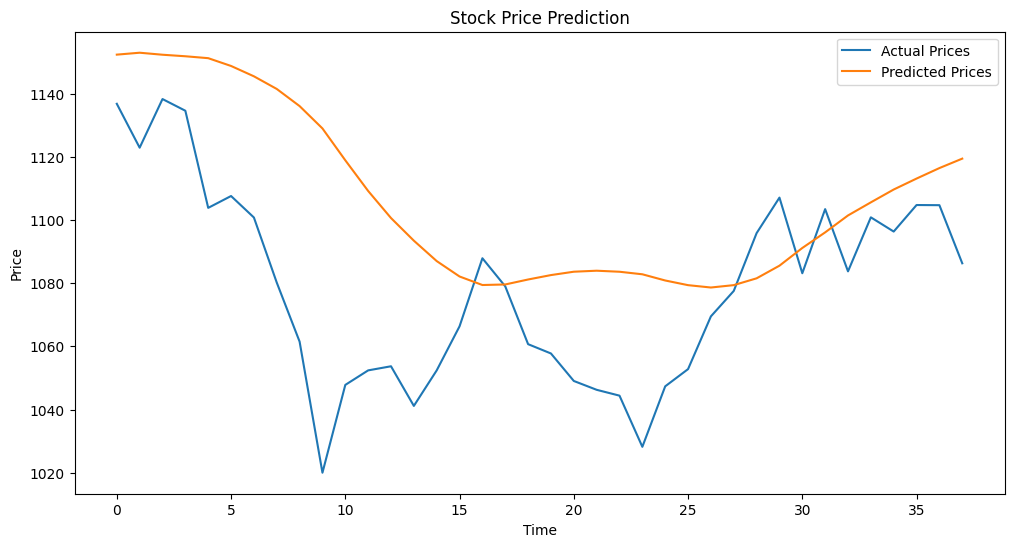

In [ ]:

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(test_predict, label='Predicted Prices')
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


SAVE THE MODEL

In [ ]:
model.save('stock_price_prediction_model.h5')
